<a href="https://colab.research.google.com/github/lohsienyen/102216013-102216003-/blob/main/bigdata_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                        ## Matrix functions
import matplotlib.pyplot as plt           ## PLotting
import pandas as pd                       ## To Work WIth Dataframes 
import plotly.express as px               ## For Interactive Visualization
import plotly.graph_objects as go         ## For Detailed visual plots
from collections import Counter         
from plotly.subplots import make_subplots ## To Plot Subplots
from wordcloud import WordCloud           ## To Generate Wordcloud
from datetime import datetime             ## Work with timeseries data
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import matplotlib.pyplot as plt #可視化
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# 連接google drive
from google.colab import drive
drive.mount('/content/gdrive')
# 載入原始檔案
data_names = pd.read_csv('/content/gdrive/My Drive/data/Restaurant names and Metadata.csv', header= 0)
print(len(data_names))
data_reviews = pd.read_csv('/content/gdrive/My Drive/data/Restaurant reviews.csv', header= 0)
print(len(data_reviews))

Mounted at /content/gdrive
105
10000


In [3]:
data_names.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [4]:
data_reviews.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [5]:
# Looking at the data types and NaN values
data_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [6]:
# 使用與其他數據集中相同的值重新命名名稱:
data_reviews = data_reviews.rename(columns={'Restaurant': 'Name'})

# 合併兩個數據集
df = pd.merge(data_reviews, data_names, how='left', on='Name')

# 刪除使用列
df.drop(['Reviewer', 'Time', 'Pictures', 'Links', 'Collections'], axis=1, inplace=True)
df.head()

Name                                             Review Rating  \
0  Beyond Flavours  The ambience was good, food was quite good . h...      5   
1  Beyond Flavours  Ambience is too good for a pleasant evening. S...      5   
2  Beyond Flavours  A must try.. great food great ambience. Thnx f...      5   
3  Beyond Flavours  Soumen das and Arun was a great guy. Only beca...      5   
4  Beyond Flavours  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata Cost  \
0   1 Review , 2 Followers  800   
1  3 Reviews , 2 Followers  800   
2  2 Reviews , 3 Followers  800   
3    1 Review , 1 Follower  800   
4  3 Reviews , 2 Followers  800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)

In [7]:
# 變更 cost and rating 的資料型態:
df['Cost'] = df['Cost'].str.replace(',', '').astype(int)
df['Rating'] = df['Rating'].str.replace('Like', '1').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      10000 non-null  object 
 1   Review    9955 non-null   object 
 2   Rating    9962 non-null   float64
 3   Metadata  9962 non-null   object 
 4   Cost      10000 non-null  int64  
 5   Cuisines  10000 non-null  object 
 6   Timings   9900 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 625.0+ KB


In [8]:
#輸入
print('Nu of data inputs:', len(df))
#檢視每個欄位的空值
print('\nNu of NaN values for each column:\n')
print(df.isnull().sum())

Nu of data inputs: 10000

Nu of NaN values for each column:

Name          0
Review       45
Rating       38
Metadata     38
Cost          0
Cuisines      0
Timings     100
dtype: int64


In [9]:
# 評分的欄位缺失有哪些餐廳:
df['Name'][df['Rating'].isnull() == True].value_counts()

American Wild Wings    23
Arena Eleven           15
Name: Name, dtype: int64

In [10]:
# 計算缺失評分欄位的平均分數:
print('Mean of Rating for American Wild Wings: ', df['Rating'][df['Name'] == 'American Wild Wings'].mean())
print('Mean of Rating for Arena Eleven: ', df['Rating'][df['Name'] == 'Arena Eleven'].mean())
print('Overall Mean of Ratings: ', df['Rating'].mean())

Mean of Rating for American Wild Wings:  3.9740259740259742
Mean of Rating for Arena Eleven:  4.117647058823529
Overall Mean of Ratings:  3.6007829753061635


In [11]:
df['Rating'].fillna(4, inplace=True)

# Changing NaN reviews by '-'
df['Review'] = df['Review'].fillna('-')
df.isnull().sum()

Name          0
Review        0
Rating        0
Metadata     38
Cost          0
Cuisines      0
Timings     100
dtype: int64

In [12]:
# 填補缺失值:
df['Metadata'].fillna('0 Review , 0 Follower', inplace=True)

# 統一格式
df['Metadata'] = df['Metadata'].str.replace('Reviews', 'Review')
df['Metadata'] = df['Metadata'].str.replace('Followers', 'Follower')

df['Metadata'][df['Metadata'].str.endswith('w')] = df['Metadata'][df['Metadata'].str.endswith('w')] + ' , - Follower'
#變成兩列
# Splitting into two columns
df[['Reviews', 'Followers']] = df['Metadata'].str.split(' , ', expand=True)

# Erasing wording from the columns
df['Reviews'] = df['Reviews'].str.replace('Review', '')
df['Reviews'] = df['Reviews'].str.replace('Posts', '')
df['Reviews'] = df['Reviews'].str.replace('Post', '')

df['Followers'] = df['Followers'].str.replace('Follower', '')
df['Followers'] = df['Followers'].str.replace('-', '0')

# 把字串改成INT
df[['Reviews', 'Followers']] = df[['Reviews', 'Followers']].astype(int)

# Dropping the initial column
df.drop(['Metadata'], axis=1, inplace=True)

# Sorting restaurants with their names and costs
# 排序 餐廳 價錢跟名字
df = df.sort_values(['Name', 'Cost'], ascending=False).reset_index()
df.drop('index', axis=1, inplace=True)

In [13]:
df.head()

Name                                             Review  Rating  Cost  \
0  eat.fit  I had ordered gobi methi paratha.. it was ok. ...     3.0   500   
1  eat.fit  Food was good but it was all leaking from the ...     3.0   500   
2  eat.fit  Intially, yes,the food was really good they we...     3.0   500   
3  eat.fit  Hyderabad's most worst and ugliest biryani i h...     1.0   500   
4  eat.fit  Very good at quality guys..even packaging is e...     4.0   500   

                                            Cuisines        Timings  Reviews  \
0  Healthy Food, North Indian, Continental, South...  7 AM to 10 PM        1   
1  Healthy Food, North Indian, Continental, South...  7 AM to 10 PM        1   
2  Healthy Food, North Indian, Continental, South...  7 AM to 10 PM        9   
3  Healthy Food, North Indian, Continental, South...  7 AM to 10 PM        1   
4  Healthy Food, North Indian, Continental, South...  7 AM to 10 PM       10   

   Followers  
0          1  
1          0  
2          0  
3          1  
4          1

Creating New Features (Mean of Ratings, Reviews, and Followers)

In [14]:
restaurants = list(df['Name'].unique())
df['Mean Rating'] = 0 #平均評分
df['Mean Reviews'] = 0 #平均評論
df['Mean Followers'] = 0 #平均追隨者

for i in range(len(restaurants)):
    df['Mean Rating'][df['Name'] == restaurants[i]] = df['Rating'][df['Name'] == restaurants[i]].mean()
    df['Mean Reviews'][df['Name'] == restaurants[i]] = df['Reviews'][df['Name'] == restaurants[i]].mean()
    df['Mean Followers'][df['Name'] == restaurants[i]] = df['Followers'][df['Name'] == restaurants[i]].mean()

In [15]:
df.sample(3)

Name  \
4721  Komatose - Holiday Inn Express & Suites   
2248                          Shanghai Chef 2   
2656                                    SKYHY   

                                                 Review  Rating  Cost  \
4721  Had been to this place on a weekend. Amazing a...     5.0  1500   
2248  I had high expectations of this restaurant but...     1.0   800   
2656  Whoever is a stag remember that you won't be a...     1.0  1400   

                                    Cuisines  \
4721  North Indian, Chinese, Japanese, Sushi   
2248        Chinese, Thai, Indonesian, Asian   
2656      North Indian, Chinese, Continental   

                                                Timings  Reviews  Followers  \
4721                                      1 PM to 11 PM       53        287   
2248                                   12 Noon to 11 PM      207       1051   
2656  12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon...        1          1   

      Mean Rating  Mean Reviews  Mean Followers  
4721         3.69         30.58          462.29  
2248         3.06         29.00          196.34  
2656         3.37         18.28           79.16

Feature Scaling 特徵縮放

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

df[['Mean Rating', 'Mean Reviews', 'Mean Followers']] = scaler.fit_transform(df[['Mean Rating', 'Mean Reviews', 'Mean Followers']]).round(2)

df.sample(3)

Name                                             Review  \
4602  Kritunga Restaurant  A complete and absolute disaster. The place wh...   
5812     Hotel Zara Hi-Fi  It’s a good restaurant and immediately deliver...   
7070       Domino's Pizza                                            Awesome   

      Rating  Cost                                   Cuisines  \
4602     1.0   500  Andhra, Biryani, Hyderabadi, North Indian   
5812     5.0   400                      Chinese, North Indian   
7070     5.0   400                           Fast Food, Pizza   

                             Timings  Reviews  Followers  Mean Rating  \
4602  12 Noon to 4 PM, 7 PM to 11 PM        5          1         2.73   
5812                11:30 AM to 1 AM        1          2         1.00   
7070                  11 AM to 11 PM        6          4         2.11   

      Mean Reviews  Mean Followers  
4602          1.28            1.13  
5812          1.22            1.10  
7070          1.37            1.19

Text Preprocessig and Cleaning

#文本欲處理與清理



In [17]:
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# 5 examples of these columns before text processing:
#處理前
df[['Review', 'Cuisines']].sample(5)

Review  \
3477  This time they degraded the quality , they gav...   
3665  Been here with my friends for my birthday part...   
7237  no vinegar or soya sauce has been provided wit...   
4656                                       good service   
5741                        the quantity is very less..   

                                         Cuisines  
3477       Chinese, Biryani, Andhra, North Indian  
3665  North Indian, Chinese, Continental, Biryani  
7237                        Chinese, Asian, Momos  
4656    Andhra, Biryani, Hyderabadi, North Indian  
5741                                    Fast Food

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
# 定義空格
replace_space = re.compile('[/(){}\[\]\|@,;]')
# 定義要刪除的符號
remove_symbols = re.compile('[^0-9a-z #+_]')
# Define stopwords
stopwords = set(stopwords.words('english'))

def text_preprocessing(text):
    # 所有字改小寫
    text = text.lower()
    
    # replace_space改成空格
    text = replace_space.sub(' ', text)
    
    # remove_symbols刪除
    text = remove_symbols.sub('', text)
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)
    
    return text

In [21]:
df['Review'] = df['Review'].apply(text_preprocessing)  #評論
df['Cuisines'] = df['Cuisines'].apply(text_preprocessing)  #菜色種類

In [22]:
# 處理後
df[['Review','Cuisines']].sample(5)

Review  \
19    ordered chefs veg special thali place awesome ...   
6841  total wastage money bread creamy flavour top e...   
3273  service amazing biryani places paradise biraya...   
7900  starting foodthey amazing delicious chinese fo...   
2771                               delivery person good   

                                               Cuisines  
19    healthy food north indian continental south in...  
6841           desserts cafe beverages burger fast food  
3273                       biryani north indian chinese  
7900                                    chinese seafood  
2771                          north indian south indian

In [23]:
# 餐廳名字
restaurant_names = list(df['Name'].unique())
restaurant_names

['eat.fit',
 "Zing's Northeast Kitchen",
 'Zega - Sheraton Hyderabad Hotel',
 'Yum Yum Tree - The Arabian Food Court',
 'Urban Asia - Kitchen & Bar',
 'Ulavacharu',
 "Udipi's Upahar",
 'Triptify',
 'Tiki Shack',
 'The Tilt Bar Republic',
 'The Old Madras Baking Company',
 'The Lal Street - Bar Exchange',
 'The Indi Grill',
 'The Glass Onion',
 'The Foodie Monster Kitchen',
 "The Fisherman's Wharf",
 'The Chocolate Room',
 'Tempteys',
 'Tandoori Food Works',
 'T Grill',
 'Squeeze @ The Lime',
 'Shree Santosh Dhaba Family Restaurant',
 'Shanghai Chef 2',
 'Shah Ghouse Spl Shawarma',
 'Shah Ghouse Hotel & Restaurant',
 "Sardarji's Chaats & More",
 'SKYHY',
 'Royal Spicy Restaurant',
 'Prism Club & Kitchen',
 'PourHouse7',
 'Pot Pourri',
 'Pista House',
 'Paradise',
 'Pakwaan Grand',
 'Owm Nom Nom',
 'Over The Moon Brew Company',
 'Olive Garden',
 'NorFest - The Dhaba',
 'Mustang Terrace Lounge',
 'Momos Delight',
 'Mohammedia Shawarma',
 'Mazzo - Marriott Executive Apartments',
 'Mathura 

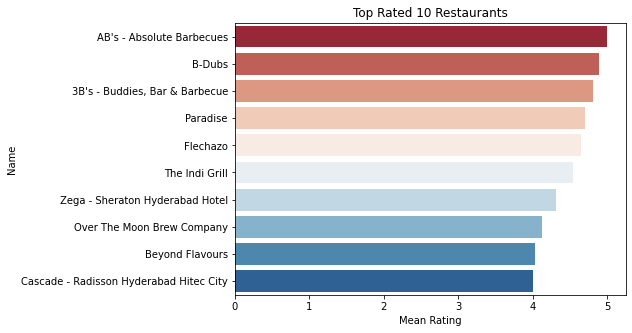

In [24]:
#評分最高的前10 名
df_rating = df.drop_duplicates(subset='Name')
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_rating, x='Mean Rating', y='Name', palette='RdBu')
plt.title('Top Rated 10 Restaurants');

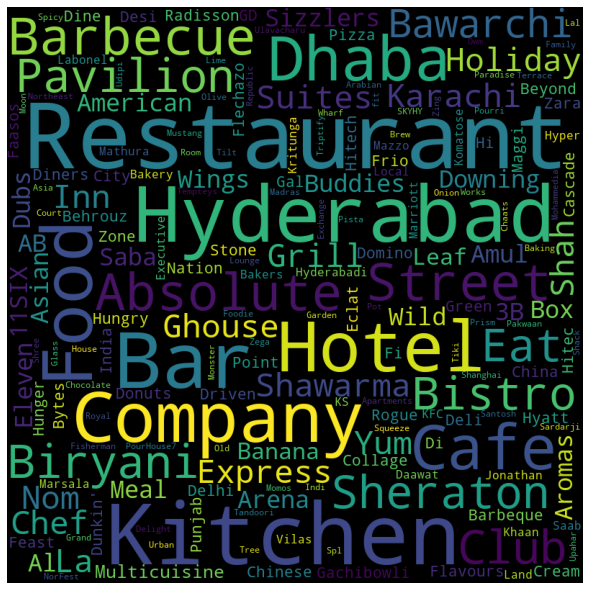

In [25]:
df_rating = df.drop_duplicates(subset='Name')
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)
list11=df['Name'].sort_values().unique()
#list12=list11.sort_values(by='Mean Rating', ascending=False).head(10)
rest_str=''
for i in list11:
    rest_str=rest_str+i+' '
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(rest_str) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

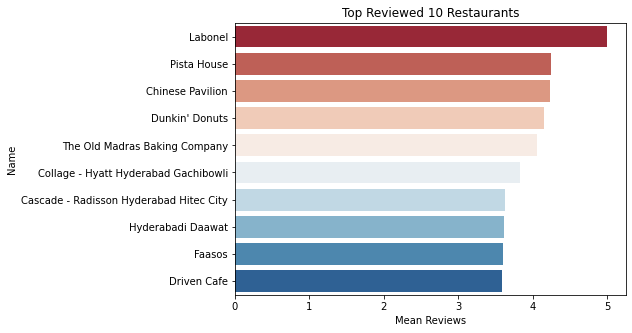

In [26]:
#最多評論的餐廳的前10名
df_reviews = df.drop_duplicates(subset='Name')
df_reviews = df_reviews.sort_values(by='Mean Reviews', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_reviews, x='Mean Reviews', y='Name', palette='RdBu')
plt.title('Top Reviewed 10 Restaurants');

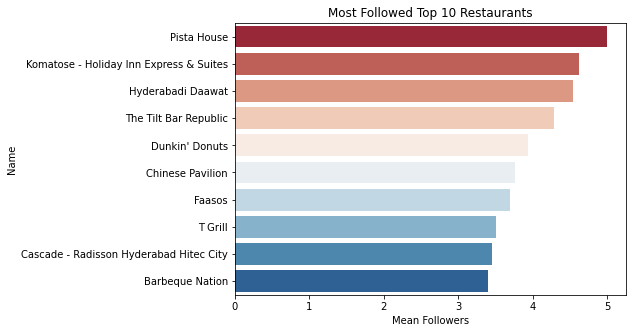

In [27]:
#最多人追蹤的前10名
df_followers = df.drop_duplicates(subset='Name')
df_followers = df_followers.sort_values(by='Mean Followers', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_followers, x='Mean Followers', y='Name', palette='RdBu')
plt.title('Most Followed Top 10 Restaurants');

In [28]:
#最多的字
def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

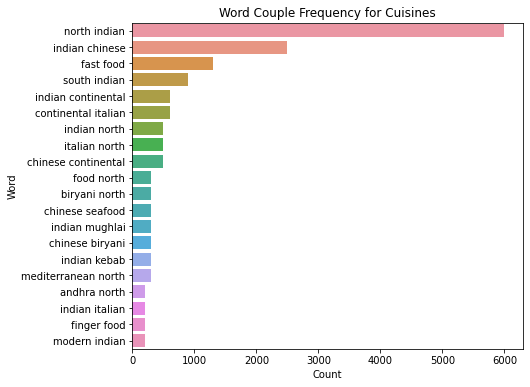

In [29]:
# 食物種類的前 20 個詞
list1 = get_top_words(df['Cuisines'], 20, (2,2))

df_words1 = pd.DataFrame(list1, columns=['Word', 'Count'])

plt.figure(figsize=(7,6))
sns.barplot(data=df_words1, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines');


In [30]:
list1 = get_top_words(df['Cuisines'], 20, (2,2))
df_words1 = pd.DataFrame(list1, columns=['Word', 'Count'])
df_words1.dtypes

Word     object
Count     int64
dtype: object

<Figure size 576x576 with 0 Axes>

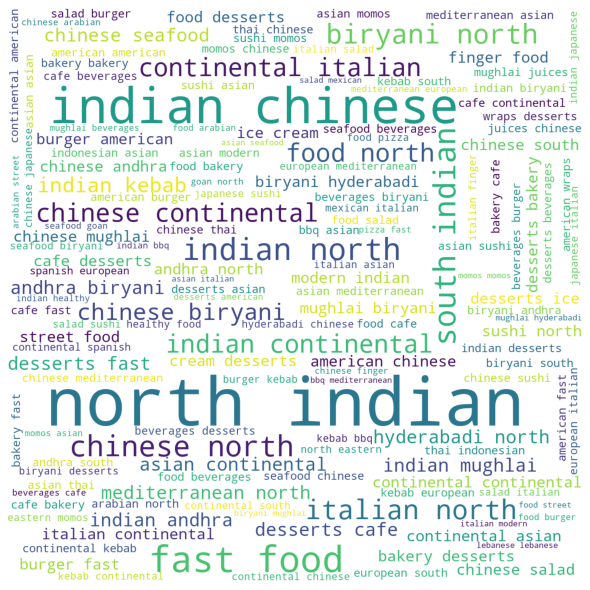

In [31]:
# 食物種類的前 20 個詞 嘗試中~~~~~
list1 = get_top_words(df['Cuisines'], 20, (2,2))
# df_words1 = pd.DataFrame(list1, columns=['Word', 'Count'])
# df_words11212=df_words1.keys()
list2 = df['Cuisines'].sort_values()
strr=''
for i in list2:
    strr=strr+i+' '
#df_words1 = pd.DataFrame(list1, columns=['Word', 'Count'])
#
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'white') 
plt.figure(figsize = (8, 8), facecolor = 'white') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

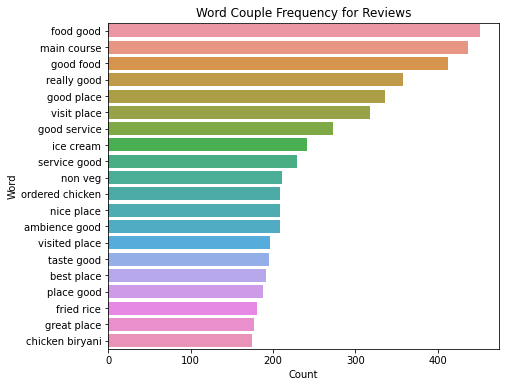

In [32]:
# 評論的前 20 個詞頻
list2 = get_top_words(df['Review'], 20, (2,2))

df_words2 = pd.DataFrame(list2, columns=['Word', 'Count'])

plt.figure(figsize=(7,6))
sns.barplot(data=df_words2, x='Count', y='Word')
plt.title('Word Couple Frequency for Reviews');

CONTENT BASE RECOMMENDER SYSTEM
TF-IDF Matrix (Term Frequency — Inverse Document Frequency Matrix)

內容庫推薦系統 TF-IDF 矩陣（詞頻 - 逆文檔頻率矩陣）

In [33]:
# 按餐廳名稱進行數據集索引
df.set_index('Name', inplace=True)

# 將索引存檔
indices = pd.Series(df.index)

# 創造 tf-idf 矩陣
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Review'])

# 計算餘弦相似度
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

創建推薦系統

In [34]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # 建立一個列表，列出10家餐廳
    recommend_restaurant = []
    
    # 查找餐廳索引值
    idx = indices[indices == name].index[0]
    
    # 找到相似的 cosine-sim 的餐廳並從bigges number開始排序
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # 提取前30個像似的cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # 排名前30個餐廳
    for each in top30_indexes:
        recommend_restaurant.append(list(df.index)[each])
    
    # 創建新數據集已顯示相似的餐廳
    df_new = pd.DataFrame(columns=['Cuisines', 'Mean Rating', 'Cost', 'Timings'])
    
    # 創建前30個餐廳的列
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df[['Cuisines','Mean Rating', 'Cost', 'Timings']][df.index == each].sample()))
    
    # 刪除相同名字的餐廳，取最高評分的前10名
    df_new = df_new.drop_duplicates(subset=['Cuisines','Mean Rating', 'Cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

1. Example:

In [35]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Hyderabadi Daawat'].head(1)

Review  Rating  \
Name                                                                           
Hyderabadi Daawat  ordered veg biryani hyderabad daawat taste ave...     3.0   

                   Cost                    Cuisines  \
Name                                                  
Hyderabadi Daawat   600  hyderabadi chinese mughlai   

                                        Timings  Reviews  Followers  \
Name                                                                  
Hyderabadi Daawat  12:30pm to 11:30pm (Mon-Sun)        5          0   

                   Mean Rating  Mean Reviews  Mean Followers  
Name                                                          
Hyderabadi Daawat         3.31          3.61            4.55

In [36]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend('Barbeque Nation')

TOP 10 RESTAURANTS LIKE Barbeque Nation WITH SIMILAR REVIEWS: 


Cuisines  \
Mazzo - Marriott Executive Apartments         italian north indian south indian asian   
Barbeque Nation                                  mediterranean north indian kebab bbq   
Udipi's Upahar                                      south indian north indian chinese   
Hyderabad Chefs                                                  north indian chinese   
Olive Garden                                 north indian chinese continental biryani   
Triptify                                                                 north indian   
Aromas@11SIX                                     north indian chinese mughlai biryani   
Marsala Food Company                                     arabian north indian chinese   
Shah Ghouse Hotel & Restaurant         biryani north indian chinese seafood beverages   
T Grill                                           north indian andhra biryani chinese   

                                       Mean Rating  Cost  \
Mazzo - Marriott Executive Apartments         3.89  1700   
Barbeque Nation                               3.77  1600   
Udipi's Upahar                                3.63   500   
Hyderabad Chefs                               3.27   600   
Olive Garden                                  3.19   700   
Triptify                                      2.85   400   
Aromas@11SIX                                  2.71   750   
Marsala Food Company                          2.71   700   
Shah Ghouse Hotel & Restaurant                2.31   800   
T Grill                                       2.24   700   

                                                                          Timings  
Mazzo - Marriott Executive Apartments                 6am to 12midnight (Mon-Sun)  
Barbeque Nation                           12 Noon to 3:30 PM, 6:30 PM to 11:30 PM  
Udipi's Upahar                                                   6 AM to 10:30 PM  
Hyderabad Chefs                                               12 Noon to 10:30 PM  
Olive Garden                                    12 Noon to 3:30 PM, 7 PM to 11 PM  
Triptify                                                           11 AM to 11 PM  
Aromas@11SIX                                              11:30 AM to 12 Midnight  
Marsala Food Company                   12noon to 4pm, 7pm to 12midnight (Mon-Sun)  
Shah Ghouse Hotel & Restaurant                                    12 Noon to 2 AM  
T Grill                                        12:30 PM to 3:30 PM, 7 PM to 11 PM

2. Example

In [37]:
# HERE IS A BAKERY. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Labonel'].head(1)

Review  Rating  Cost  \
Name                                                                       
Labonel  let make simple brownies die huge variety cupc...     4.0  1000   

                Cuisines                              Timings  Reviews  \
Name                                                                     
Labonel  bakery desserts  11 AM to 8 PM (Mon-Sat), Sun Closed       18   

         Followers  Mean Rating  Mean Reviews  Mean Followers  
Name                                                           
Labonel         86         3.44           5.0            3.27

In [38]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend('Labonel')

TOP 3 RESTAURANTS LIKE Labonel WITH SIMILAR REVIEWS: 


Cuisines  Mean Rating Cost  \
Cream Stone                         ice cream desserts         3.33  350   
Karachi Cafe                   cafe desserts fast food         3.12  600   
The Old Madras Baking Company                   bakery         2.92  350   

                                                                         Timings  
Cream Stone                    10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri...  
Karachi Cafe                                                      10 AM to 10 PM  
The Old Madras Baking Company                                      7 AM to 11 PM

3. Example:

In [39]:
# HERE IS A MEDITERRANEAN / NORT INDIAN / KEBAB / BBQ RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Barbeque Nation'].sample(1)

Review  Rating  \
Name                                                                         
Barbeque Nation  visited place 2nd october family celebrate sis...     5.0   

                 Cost                              Cuisines  \
Name                                                          
Barbeque Nation  1600  mediterranean north indian kebab bbq   

                                                 Timings  Reviews  Followers  \
Name                                                                           
Barbeque Nation  12 Noon to 3:30 PM, 6:30 PM to 11:30 PM      362       4102   

                 Mean Rating  Mean Reviews  Mean Followers  
Name                                                        
Barbeque Nation         3.77          3.02             3.4

In [40]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend("Prism Club & Kitchen")

TOP 10 RESTAURANTS LIKE Prism Club & Kitchen WITH SIMILAR REVIEWS: 


Cuisines  \
Udipi's Upahar                  south indian north indian chinese   
Tempteys                                       desserts beverages   
10 Downing Street                north indian chinese continental   
Momos Delight                                               momos   
Green Bawarchi Restaurant            north indian chinese biryani   
Kritunga Restaurant        andhra biryani hyderabadi north indian   
Tandoori Food Works                     north indian burger kebab   
Hunger Maggi Point                                      fast food   
Faasos                                 fast food biryani desserts   
Mohammedia Shawarma                           street food arabian   

                           Mean Rating  Cost  \
Udipi's Upahar                    3.63   500   
Tempteys                          3.34   350   
10 Downing Street                 3.26  1900   
Momos Delight                     3.14   200   
Green Bawarchi Restaurant         2.76   700   
Kritunga Restaurant               2.73   500   
Tandoori Food Works               2.40   500   
Hunger Maggi Point                2.16   200   
Faasos                            2.02   600   
Mohammedia Shawarma               1.95   150   

                                                                     Timings  
Udipi's Upahar                                              6 AM to 10:30 PM  
Tempteys                                                    11:30 AM to 1 AM  
10 Downing Street                                     12 Noon to 12 Midnight  
Momos Delight                                           6pm to 2am (Mon-Sun)  
Green Bawarchi Restaurant                                   12 Noon to 11 PM  
Kritunga Restaurant                           12 Noon to 4 PM, 7 PM to 11 PM  
Tandoori Food Works        12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)...  
Hunger Maggi Point                                        4:30 PM to 5:30 AM  
Faasos                                                          9 AM to 1 AM  
Mohammedia Shawarma                                             1 PM to 1 AM

------------------分隔線--------

視覺化

In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [42]:
# 連接google drive
from google.colab import drive
drive.mount('/content/gdrive')
# 載入原始檔案
data_names = pd.read_csv('/content/gdrive/My Drive/data/Restaurant names and Metadata.csv', header= 0)
print(len(data_names))
data_reviews = pd.read_csv('/content/gdrive/My Drive/data/Restaurant reviews.csv', header= 0)
print(len(data_reviews))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
105
10000


In [43]:
data_names['Cost']=pd.to_numeric(data_names['Cost'].str.replace(',',''))
data_names.dtypes

Name           object
Links          object
Cost            int64
Collections    object
Cuisines       object
Timings        object
dtype: object

In [44]:
data_reviews.dropna(inplace=True)

In [45]:
data_reviews[data_reviews['Rating']=='Like']

Restaurant           Reviewer  \
7601  The Old Madras Baking Company  Dhanasekar Kannan   

                                                 Review Rating  \
7601  One of the best pizzas to try. It served with ...   Like   

                       Metadata             Time  Pictures  
7601  12 Reviews , 21 Followers  5/18/2019 12:31         1

In [46]:
data_reviews=data_reviews[data_reviews['Rating']!='Like']
data_reviews[data_reviews['Rating']=='Like']

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures]
Index: []

In [47]:
data_reviews['Rating']=pd.to_numeric(data_reviews['Rating'])
data_reviews['Reviews'],data_reviews['Followers']=data_reviews['Metadata'].str.split(',').str
data_reviews['Reviews']=pd.to_numeric(data_reviews['Reviews'].str.split(' ').str[0])
data_reviews['Followers']=pd.to_numeric(data_reviews['Followers'].str.split(' ').str[1])
data_reviews['Time']=pd.to_datetime(data_reviews['Time'])
data_reviews=data_reviews.loc[:,['Restaurant','Reviewer','Review','Rating','Reviews','Followers','Time','Pictures']]
data_reviews.dtypes

Restaurant            object
Reviewer              object
Review                object
Rating               float64
Reviews                int64
Followers            float64
Time          datetime64[ns]
Pictures               int64
dtype: object

利用for迴圈計算食物種類筆數並畫出來

The Top 10 Cuisines are:
                Counts of Restaurants
North Indian                      61
Chinese                           43
Continental                       21
Biryani                           16
Fast Food                         15
Asian                             15
Italian                           14
Desserts                          13
South Indian                       9
Bakery                             7
Kebab                              6
Cafe                               6
Andhra                             6
Mughlai                            6
American                           6
Salad                              5
Burger                             5
Mediterranean                      5
Beverages                          5
Momos                              4
Seafood                            4
European                           4
Hyderabadi                         4
Sushi                              4
Thai                               3
Modern India

Text(0.5, 1.0, 'Cuisines at Restaurants in Hyderabad (in order of Popularity)')

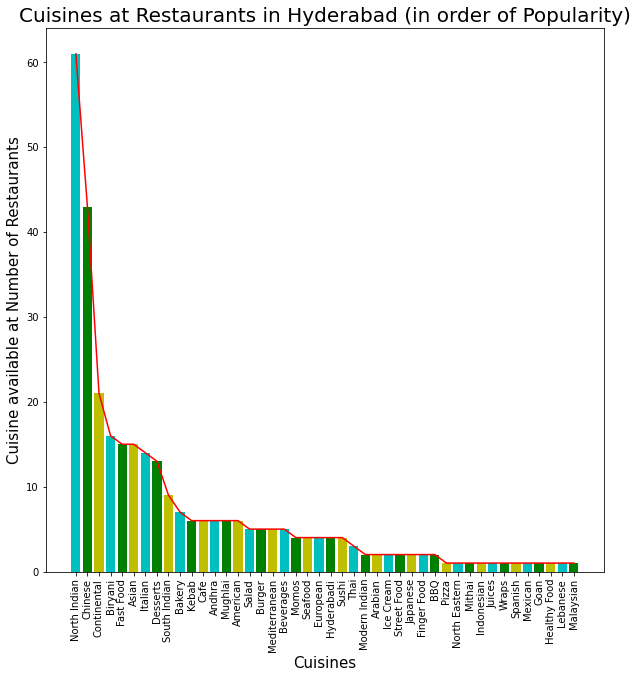

In [48]:
#利用for迴圈計算食物種類筆數並畫出來
cuisine_list=data_names.Cuisines.str.split(', ')
cuis={}
for i in cuisine_list:
    for j in i:
        if (j in cuis):
            cuis[j]+=1
        else:
            cuis[j]=1
cuis_df=pd.DataFrame(cuis.values(),index=cuis.keys(),columns={'Counts of Restaurants'})
cuis_df.sort_values(by='Counts of Restaurants',ascending=False,inplace=True)
#top_10_cuis=cuis_df[0:10]
top_10_cuis=cuis_df
print('The Top 10 Cuisines are:\n',top_10_cuis)
top_10_cuis.reset_index()
plt.figure(figsize=(10,10))
plt.plot(cuis_df.index,cuis_df['Counts of Restaurants'],color='r')
plt.bar(cuis_df.index,cuis_df['Counts of Restaurants'],color='cgy')
plt.xlabel('Cuisines',size=15)
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants',size=15)
plt.title('Cuisines at Restaurants in Hyderabad (in order of Popularity)',size=20)

將美食種類變成文字雲

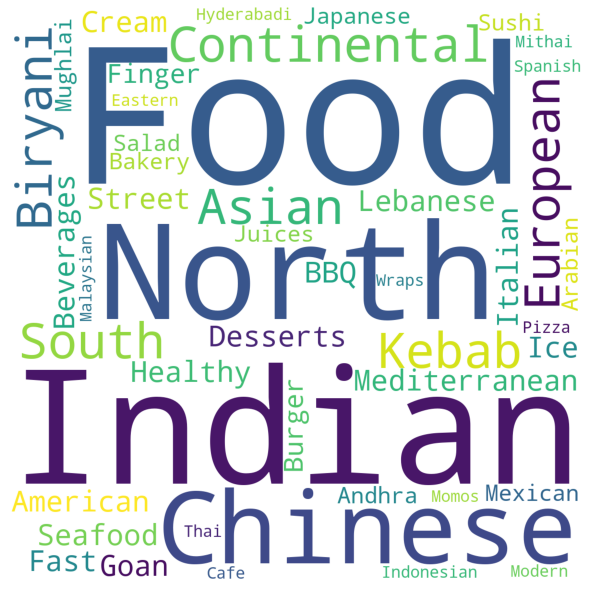

In [49]:
word_list=cuis.keys()
strr=''
for i in word_list:
    strr=strr+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'white') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

把各家餐廳的價位做排序與畫圖

The Analysis upon 105 restaurants show- The Average Cost at a Restaurant in Hyderabad is ₹861.4285714285714
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
The Top 5 Costliest Restaurants of Hyderabad are:

                                                 Name    Cost
23               Collage - Hyatt Hyderabad Gachibowli  2800.0
35                   Feast - Sheraton Hyderabad Hotel  2500.0
0                                   10 Downing Street  1900.0
48  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
20            Cascade - Radisson Hyderabad Hitec City  1800.0
---------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------
The Top 5 Cheapest Re

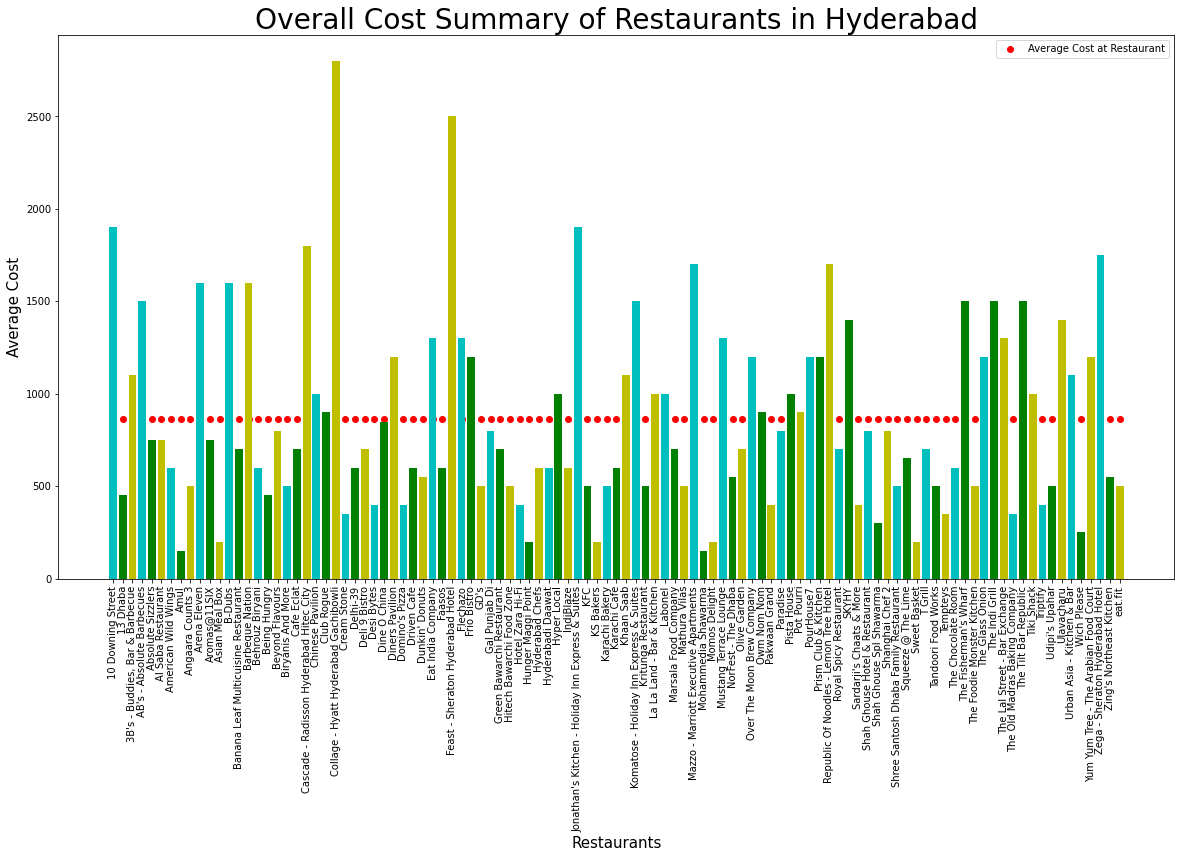

In [50]:
rest_cost=data_names.groupby('Name').apply(lambda x:np.average(x['Cost'])).reset_index(name='Cost')
avg=np.average(rest_cost['Cost'])

plt.figure(figsize=(20,10))
plt.bar(rest_cost['Name'],rest_cost['Cost'],color='cgy')
for i in rest_cost['Name']:
    plt.scatter(i,avg,color='r')
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants in Hyderabad',size=28)
plt.legend(['Average Cost at Restaurant'])
rest_cost.sort_values(by='Cost',ascending=False,inplace=True)
print('The Analysis upon {} restaurants show- The Average Cost at a Restaurant in Hyderabad is ₹{}'.format(len(rest_cost),avg))
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')
print('The Top 5 Costliest Restaurants of Hyderabad are:\n')
print(rest_cost[:5])
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')
print('The Top 5 Cheapest Restaurants of Hyderabad are:\n')
print(rest_cost[-5:])
print('---------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------')

使用餐廳名稱創建詞云

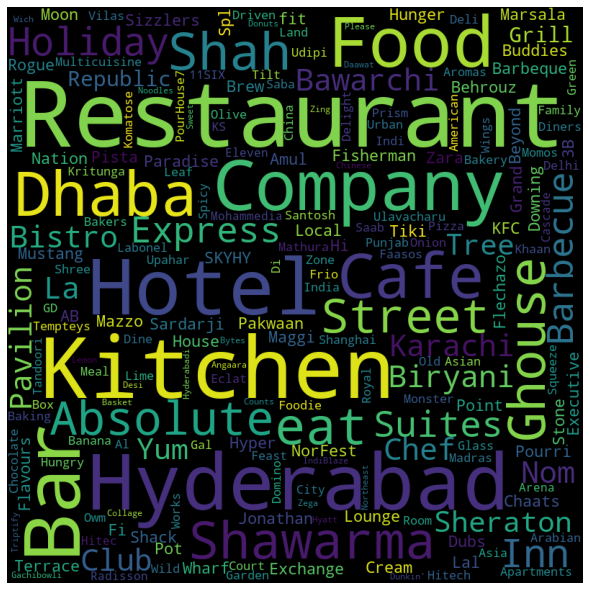

In [51]:
rests=data_names.Name.unique()
rest_str=''
for i in rests:
    rest_str=rest_str+i+' '
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black',  
                min_font_size = 10).generate(rest_str) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

Identifying the data_reviewsers who have submitted the highest number of data_reviewss (Top 15)- as well as the data_reviews submission distribution curve

#識別提交評論數量最多的評論者（Top 15）——以及評論提交分佈曲線

A total of 7442 users have sumbitted a data_reviews- with each user submitting at an average of 1.3375436710561677 data_reviewss
----------The Top 15 Users who have submitted the most data_reviewss------------
                            Reviewer  Review Count
654                           Ankita            13
3855                     Parijat Ray            13
2652                           Kiran            12
7009                    Vedant Killa            11
2311                       Jay Mehta            11
3131           Manojkumar D Nambisan            10
6126                         Sravani            10
5954                      Siva Kumar            10
4256                        Priyanka            10
264   Age Of Foodies (Suraj Karambe)            10
4130                 Prasun Gokhlani             9
3998               Prachita Jayaswal             9
3694                           Nillu             9
2642                 Khushboo Pandey             9
7172                     

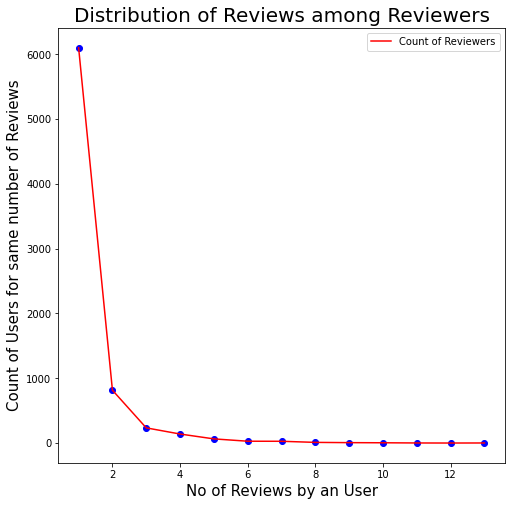

In [52]:
#發表1次研究的有6000人，發表2次的大概900多接著繼續
top_data_reviewser=data_reviews.groupby('Reviewer').apply(lambda x:x['Reviewer'].count()).reset_index(name='Review Count')
top_data_reviewser=top_data_reviewser.sort_values(by='Review Count',ascending=False)
print('A total of {} users have sumbitted a data_reviews- with each user submitting at an average of {} data_reviewss'.format(data_reviews.Reviewer.nunique(),np.average(data_reviews.Reviewer.value_counts())))
print('----------The Top 15 Users who have submitted the most data_reviewss------------')
print(top_data_reviewser[:15])
top_data_reviewser_count=top_data_reviewser.groupby('Review Count').apply(lambda x:x['Review Count'].count()).reset_index(name='Counts')
plt.figure(figsize=(8,8))
plt.plot(top_data_reviewser_count['Review Count'],top_data_reviewser_count['Counts'],color='r')
plt.scatter(top_data_reviewser_count['Review Count'],top_data_reviewser_count['Counts'],color='b')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Count of Users for same number of Reviews',size=15)
plt.title('Distribution of Reviews among Reviewers',size=20)
plt.legend(['Count of Reviewers'])

Reviews vs Ratings Distribution from the list of Reviewers


評論者列表中的評論與評分分佈

A total of 7442 users have sumbitted a rating- with an average rating of-> 3.578301536992077 
----------Ratings submitted by the Top 15 Users------------
                          Reviewer  Review Count  Average Ratings
0                           Ankita            13         3.923077
1                      Parijat Ray            13         3.192308
2                            Kiran            12         4.500000
3                     Vedant Killa            11         4.000000
4                        Jay Mehta            11         3.727273
5            Manojkumar D Nambisan            10         3.700000
6                          Sravani            10         4.000000
7                       Siva Kumar            10         3.600000
8                         Priyanka            10         2.600000
9   Age Of Foodies (Suraj Karambe)            10         3.500000
10                 Prasun Gokhlani             9         4.000000
11               Prachita Jayaswal             9      

Text(0.5, 1.0, 'Average Ratings per Review Submitted Distribution')

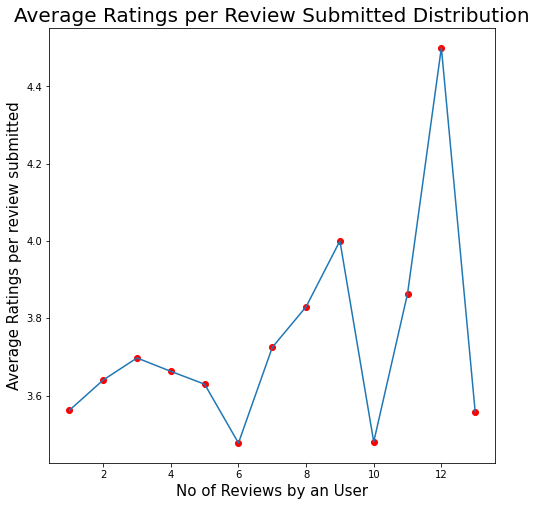

In [53]:
data_reviews_ratings=data_reviews.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
print('A total of {} users have sumbitted a rating- with an average rating of-> {} '.format(data_reviews.Reviewer.nunique(),np.average(data_reviews_ratings['Average Ratings'])))
data_reviews_ratings=pd.merge(top_data_reviewser,data_reviews_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_data_reviewsers=data_reviews_ratings[:15]
print('----------Ratings submitted by the Top 15 Users------------')
print(top_data_reviewsers)
data_reviews_ratings_plot=data_reviews_ratings.groupby('Review Count').apply(lambda x:np.average(x['Average Ratings'])).reset_index(name='Average')
plt.figure(figsize=(8,8))
plt.plot(data_reviews_ratings_plot['Review Count'],data_reviews_ratings_plot['Average'])
plt.scatter(data_reviews_ratings_plot['Review Count'],data_reviews_ratings_plot['Average'],color='r')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Average Ratings per review submitted',size=15)
plt.title('Average Ratings per Review Submitted Distribution',size=20)

通過 Restaurants 識別 Top Reviwerers 的評分模式

Text(0.5, 1.0, 'Ratings of the Restaurants by the Top Reviewers')

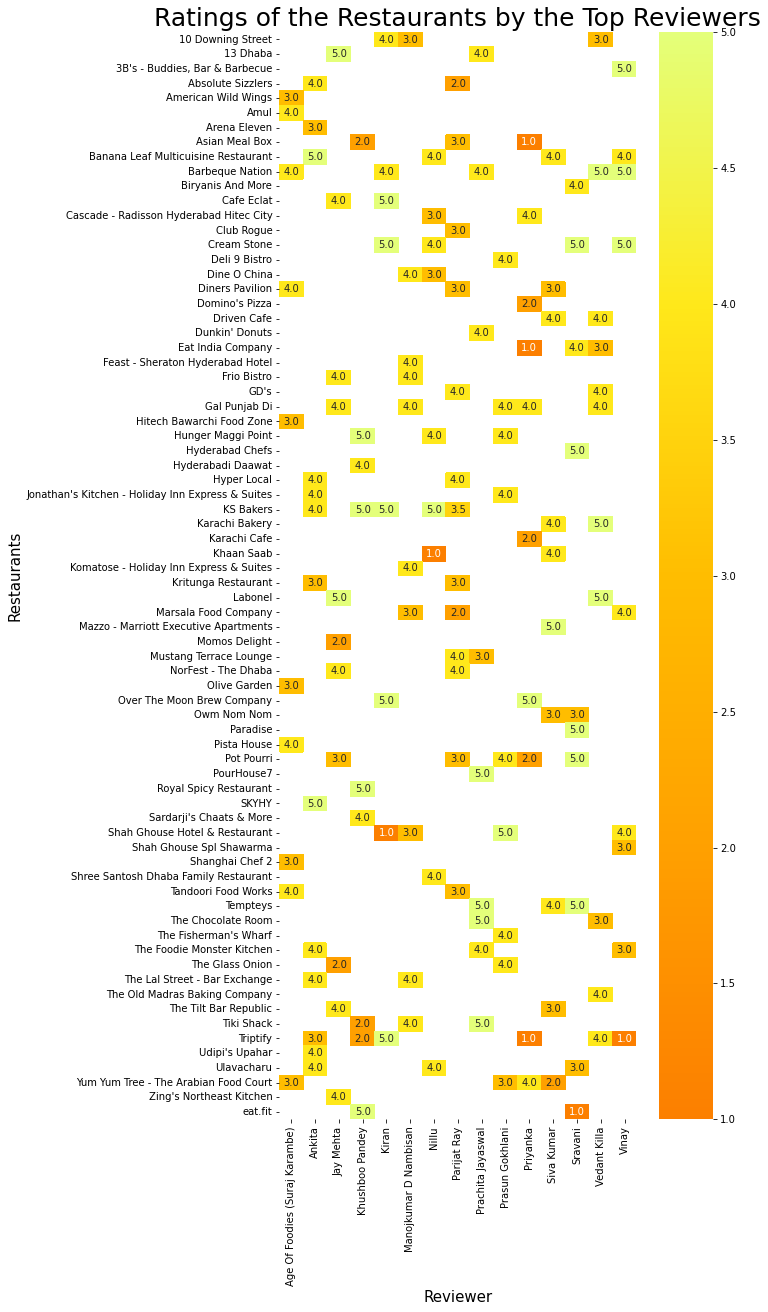

In [54]:
top_data_reviewss=pd.merge(top_data_reviewsers,data_reviews,how='inner',left_on='Reviewer',right_on='Reviewer')
top_data_reviewss_avg=top_data_reviewss.groupby(['Reviewer','Restaurant']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
rating_pivot=pd.pivot(top_data_reviewss_avg,values='Average Ratings',index='Restaurant',columns='Reviewer')
rating_pivot.replace(np.NaN,0)
plt.figure(figsize=(8,20))
sns.heatmap(rating_pivot,annot=True,fmt='.1f',cmap='Wistia_r')
plt.xlabel('Reviewer',size=15)
plt.ylabel('Restaurants',size=15)
plt.title('Ratings of the Restaurants by the Top Reviewers',size=25)

評論者/追隨者隨時間的變化

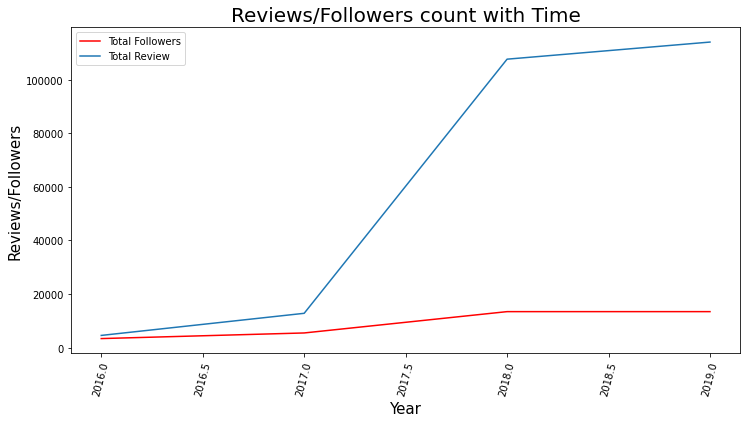

In [55]:
data_reviews['Year'] = pd.DatetimeIndex(data_reviews['Time']).year
data_reviews_follow_1=data_reviews.groupby('Year').apply(lambda x:np.sum(x['Reviews'])).reset_index(name='Total Reviews')
data_reviews_follow_2=data_reviews.groupby('Year').apply(lambda x:np.max(x['Followers'])).reset_index(name='Total Followers')
data_reviews_follow=pd.merge(data_reviews_follow_1,data_reviews_follow_2,how='inner',left_on='Year',right_on='Year')
plt.figure(figsize=(12,6))
plt.plot(data_reviews_follow['Year'],data_reviews_follow['Total Followers'],color='r')
plt.plot(data_reviews_follow['Year'],data_reviews_follow['Total Reviews'])
plt.xlabel('Year',size=15)
plt.xticks(rotation=75)
plt.ylabel('Reviews/Followers',size=15)
plt.title('Reviews/Followers count with Time',size=20)
plt.legend(['Total Followers','Total Review'])

餐廳的平均評分 - 總體

The Analysis upon 100 restaurants show- The Average Ratings for data_names in Hyderabad is 3.6018905398523047
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
The 5 Best Rated Restaurants are:
                         Restaurant  Average Ratings
3        AB's - Absolute Barbecues             4.88
11                          B-Dubs             4.81
2   3B's - Buddies, Bar & Barbecue             4.76
67                        Paradise             4.70
35                        Flechazo             4.66
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
The 5 Worst Rated Restaurants are:
           Restaurant  Average Ratings
14   Behrouz Biry

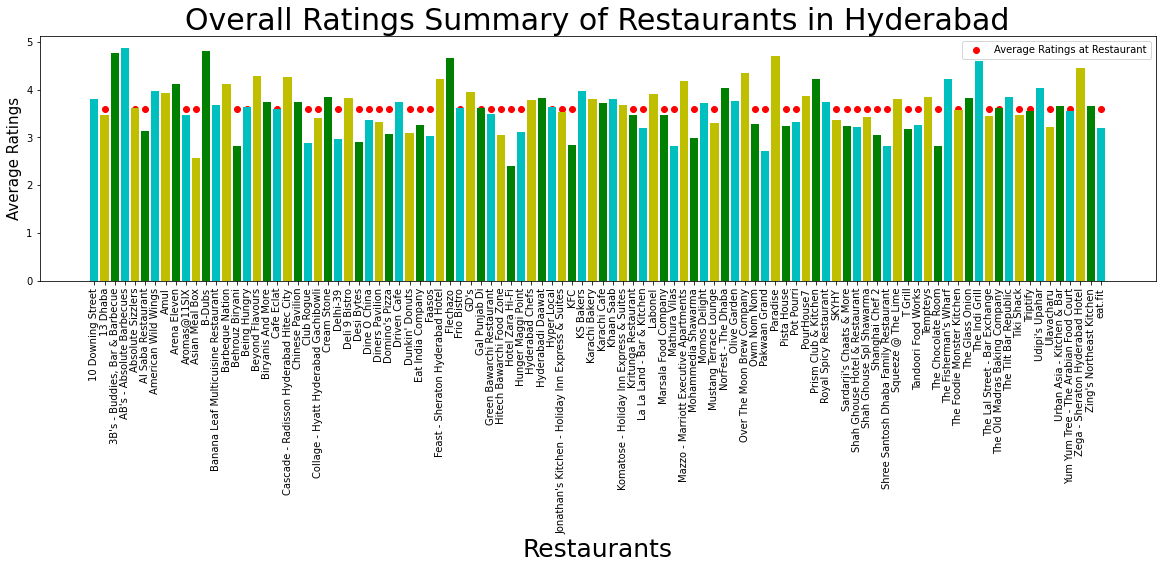

In [56]:
rats=data_reviews.groupby("Restaurant").apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
avg=np.average(rats['Average Ratings'])
plt.figure(figsize=(20,4.5))
plt.bar(rats["Restaurant"],rats['Average Ratings'],color='cyg')
for i in rats["Restaurant"]:
    plt.scatter(i,avg,color='r')
plt.xlabel('Restaurants',size=25)
plt.xticks(rotation=90)
plt.ylabel('Average Ratings',size=15)
plt.title('Overall Ratings Summary of Restaurants in Hyderabad',size=30)
plt.legend(['Average Ratings at Restaurant'])
rats.sort_values(by='Average Ratings',ascending=False,inplace=True)
print('The Analysis upon {} restaurants show- The Average Ratings for data_names in Hyderabad is {}'.format(len(rats),avg))
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')
print('The 5 Best Rated Restaurants are:\n',rats[:5])
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')
print('The 5 Worst Rated Restaurants are:\n',rats[-5:])
print('----------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------')

多年來 Restaurants 的平均評分

Text(0.5, 1.0, 'Restaurants Ratings over the Years')

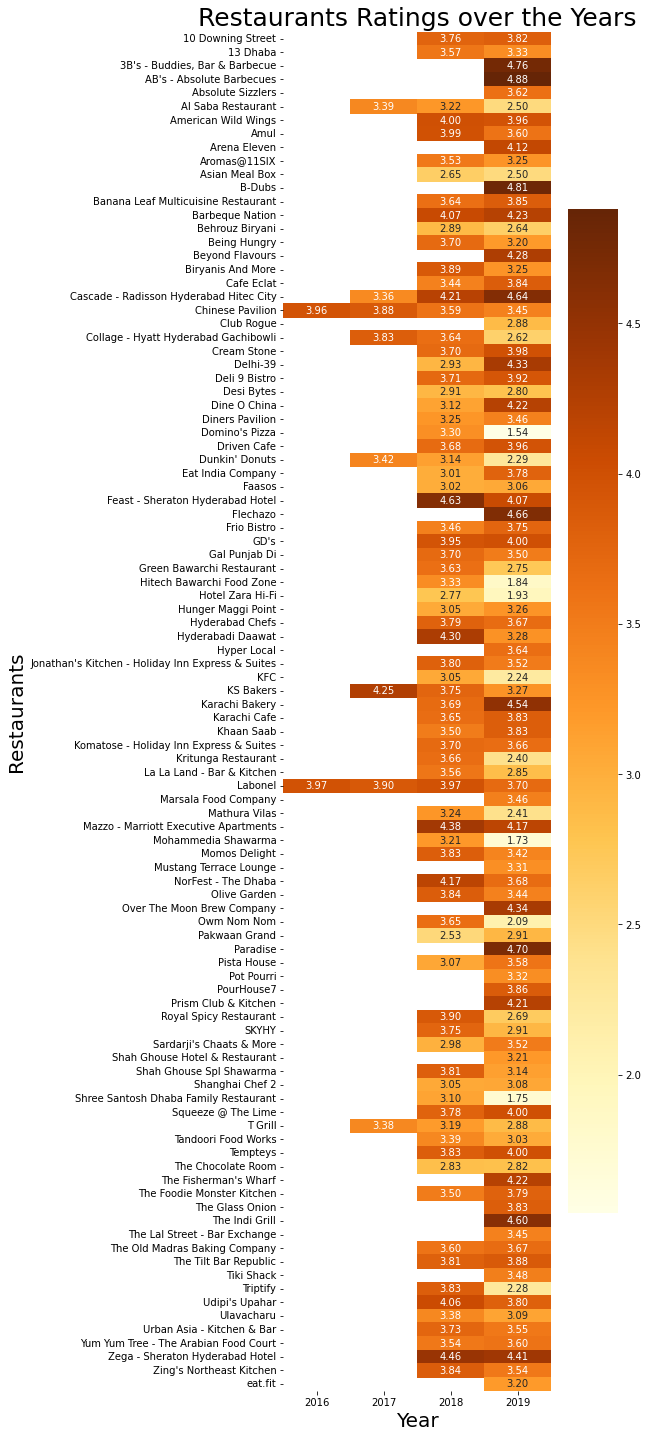

In [57]:
rest_time_rev=data_reviews.groupby(['Restaurant','Year']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Overall Score')
heatmap_df=pd.pivot(rest_time_rev,values='Average Overall Score',index='Restaurant',columns='Year')
plt.figure(figsize=(6,25))
sns.heatmap(heatmap_df,annot=True,fmt='.2f',cmap='YlOrBr')
plt.xlabel('Year',size=20)
plt.ylabel('Restaurants',size=20)
plt.title('Restaurants Ratings over the Years',size=25)

In [58]:
def word_req(strr):
    strs=''
    punctutations=[',','!','@','"',"'",'(',')','/','-','*','$',':',';','#','%','&']
    breaks=['\n','.']
    strr1=strr.lower()
    for i in strr1:
        for j in i:
            if j in punctutations:
                continue 
            elif j in breaks:
                strs=strs+' '
            else:
                strs=strs+j
    return strs

In [59]:
data_reviews_list=data_reviews.groupby('Review').apply(lambda x:word_req(x['Review'].str).split()).reset_index(name='Words List')
merged_data_reviews=pd.merge(data_reviews,data_reviews_list,how='inner',left_on='Review',right_on='Review')
#merged_data_reviews


識別評論中的圖片與時間的關係

Text(0.5, 1.0, 'Picture Count in Reviews with Time')

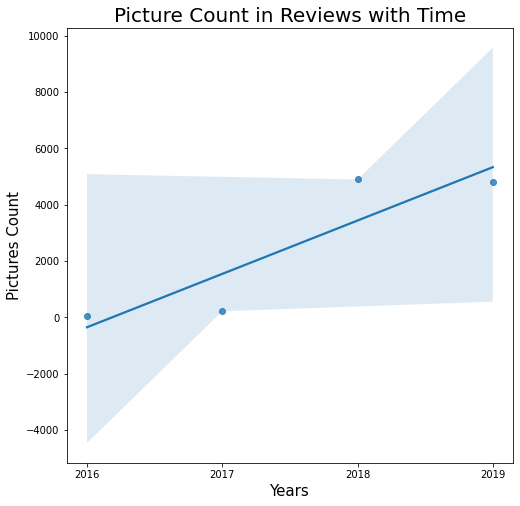

In [60]:
pic_yr=merged_data_reviews.groupby('Year').apply(lambda x:x['Pictures'].count()).reset_index(name='Pic Count')
plt.figure(figsize=(8,8))
sns.regplot(pic_yr['Year'],pic_yr['Pic Count'])
plt.xlabel('Years',size=15)
plt.xticks(np.arange(np.min(pic_yr['Year']),np.max(pic_yr['Year'])+1))
plt.ylabel('Pictures Count',size=15)
plt.title('Picture Count in Reviews with Time',size=20)


識別評論中最常見的詞

TOP10字詞 未過濾

Text(0.5, 1.0, 'Most Popular Keywords in Zomato Reviews in Hyderabad')

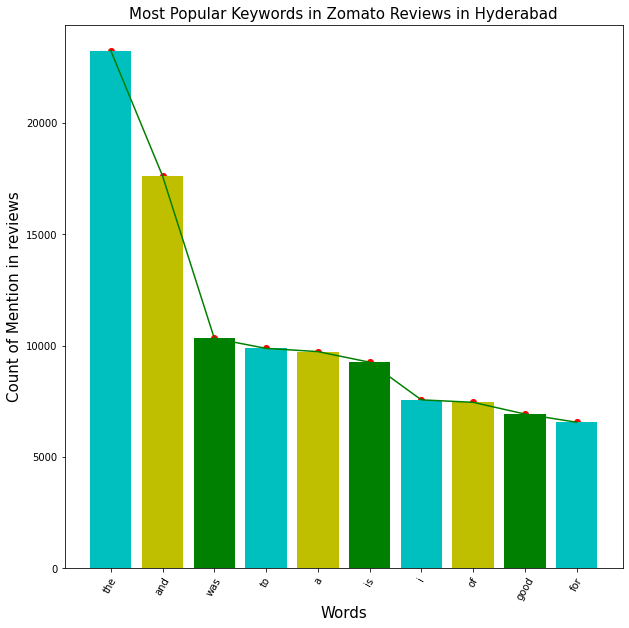

In [61]:
words_list=merged_data_reviews['Words List']
data_reviewss={}
for i in words_list:
    for j in i:
        if (j in data_reviewss):
            data_reviewss[j]+=1
        else:
            data_reviewss[j]=1
data_reviewss_df=pd.DataFrame(data_reviewss.values(),index=data_reviewss.keys(),columns={'Counts'})
sorted_data_reviewss_df=data_reviewss_df.sort_values(by='Counts',ascending=False)
top_10_data_reviewss=sorted_data_reviewss_df[0:10]
top_10_data_reviewss.reset_index()
plt.figure(figsize=(10,10))
plt.plot(top_10_data_reviewss.index,top_10_data_reviewss.Counts,color='g')
plt.bar(top_10_data_reviewss.index,top_10_data_reviewss.Counts,color='cyg')
plt.scatter(top_10_data_reviewss.index,top_10_data_reviewss.Counts,color='r')
plt.xlabel('Words',size=15)
plt.xticks(rotation=60)
plt.ylabel('Count of Mention in reviews',size=15)
plt.title('Most Popular Keywords in Zomato Reviews in Hyderabad',size=15)

創建忽略語句中的語法附加組件的單詞分佈

In [62]:
from nltk.corpus import stopwords

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

過濾字詞 TOP10

Text(0.5, 1.0, 'Most Popular Keywords in Zomato Reviews in Hyderabad')

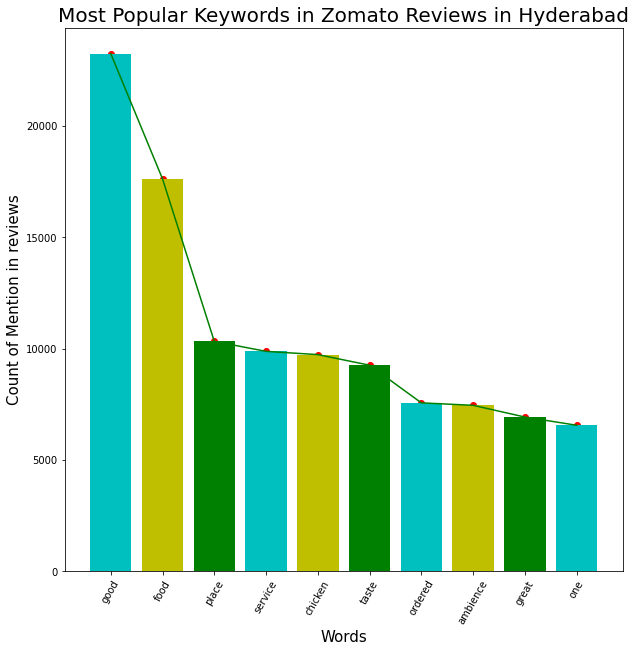

In [64]:
articles=['the','a','an']
preposition=['in','on','at','to','for','from','of','with','since','too','by','it','this','that']
conjunction=['and','but','as','also','or','not']
verb=['is','was','are','were','have','had']
noun=['i','we','us','my','he','she','they','you','all']
stopwords = set(stopwords.words('english'))
modified_data_reviewss=[]
for i in data_reviewss:
    if (i in articles or i in preposition or i in conjunction or i in verb or i in noun or i in stopwords):
        continue
    else:
        modified_data_reviewss.append(i)
modified_data_reviewss_df=pd.DataFrame(index=modified_data_reviewss)
modified_word_list=pd.merge(data_reviewss_df,modified_data_reviewss_df,how='inner',left_index=True,right_index=True)
modified_word_list_sort=modified_word_list.sort_values(by='Counts',ascending=False)
modified_word_list_top10=modified_word_list_sort[:10]
plt.figure(figsize=(10,10))
plt.plot(modified_word_list_top10.index,top_10_data_reviewss.Counts,color='g')
plt.bar(modified_word_list_top10.index,top_10_data_reviewss.Counts,color='cyg')
plt.scatter(modified_word_list_top10.index,top_10_data_reviewss.Counts,color='r')
plt.xlabel('Words',size=15)
plt.xticks(rotation=60)
plt.ylabel('Count of Mention in reviews',size=15)
plt.title('Most Popular Keywords in Zomato Reviews in Hyderabad',size=20)

使用評論中最常用的詞創建詞云

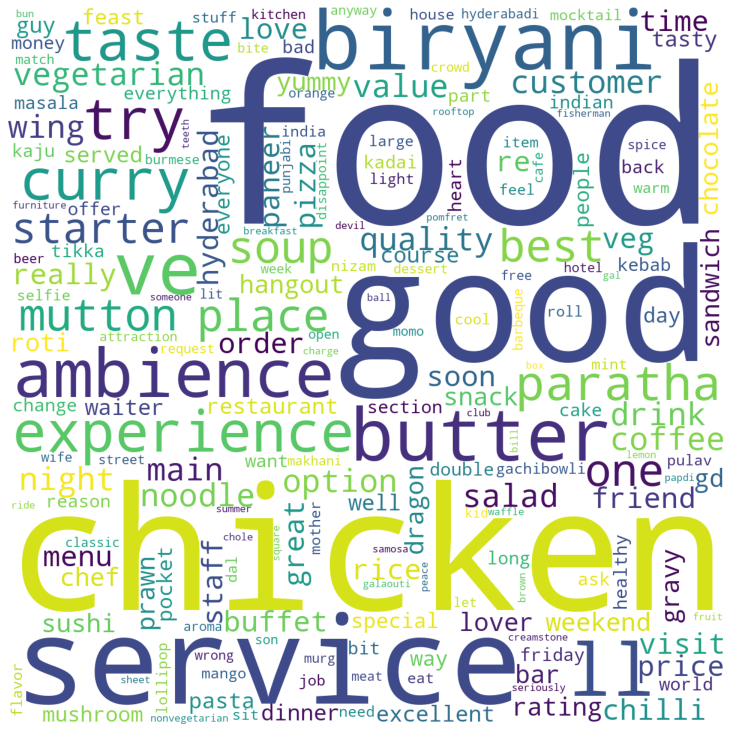

In [65]:
data_reviews_str=''
for i in modified_data_reviewss:
    data_reviews_str=data_reviews_str+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',  
                min_font_size = 10).generate(data_reviews_str) 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

準備情緒分析詞數據集 提取正面和負面詞進行分析

In [66]:
positive_df=pd.read_fwf('/content/gdrive/My Drive/data/positive-words.txt')
negative_df=pd.read_fwf('/content/gdrive/My Drive/data/negative-words.txt')
positive_words=positive_df['a+'].tolist()
negative_words=negative_df['2-faced'].tolist()

創建返回每個數據中積極詞的函數

In [67]:
def pos_count(word_list):
    pos_tot_count=0
    for i in word_list:
        if i in positive_words:
            pos_tot_count=pos_tot_count+1
        else:
            continue
    return pos_tot_count
p_no=0
pos_dict={}
for i in merged_data_reviews['Words List']:
    num=pos_count(i)
    pos_dict[p_no]=num
    p_no+=1
positive_data_reviews_df=pd.DataFrame(pos_dict.values(),index=pos_dict.keys(),columns={'Positive_Count'})

創建返回每個數據中否定詞數的函數

In [68]:
def neg_count(word_list):
    neg_tot_count=0
    for i in word_list:
        if i in negative_words:
            neg_tot_count=neg_tot_count+1
        else:
            continue
    return neg_tot_count
n_no=0
neg_dict={}
for i in merged_data_reviews['Words List']:
    num=neg_count(i)
    neg_dict[n_no]=num
    n_no+=1
negative_data_reviews_df=pd.DataFrame(neg_dict.values(),index=neg_dict.keys(),columns={'Negative_Count'})

計算每一筆評論 正面字詞-負面字詞=Overall的分數

In [69]:
data_reviews_df=pd.merge(positive_data_reviews_df,negative_data_reviews_df,how='outer',left_index=True,right_index=True)
data_reviews_df['Overall Score']=data_reviews_df['Positive_Count']-data_reviews_df['Negative_Count']
merged_data_reviews_df=pd.merge(merged_data_reviews,data_reviews_df,how='inner',left_index=True,right_index=True)
merged_data_reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9949  Chinese Pavilion      Abhishek Mahajan   
9950  Chinese Pavilion        Sharad Agrawal   
9951  Chinese Pavilion             Ramandeep   
9952  Chinese Pavilion       Nayana Shanbhag   
9953  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  Reviews  \
0     The ambience was good, food was quite good . h...     5.0        1   
1     Ambience is too good for a pleasant evening. S...     5.0        3   
2     A must try.. great food great ambience. Thnx f...     5.0        2   
3     Soumen das and Arun was a great guy. Only beca...     5.0        1   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0        3   
...                                                 ...     ...      ...   
9949  Madhumathi Mahajan Well to start with nice cou...     3.0       53   
9950  This place has never disappointed us.. The foo...     4.5        2   
9951  Bad rating is mainly because of "Chicken Bone ...     1.5       65   
9952  I personally love and prefer Chinese Food. Had...     4.0       13   
9953  Checked in here to try some delicious chinese ...     3.5      472   

      Followers                Time  Pictures  Year  \
0           2.0 2019-05-25 15:54:00         0  2019   
1           2.0 2019-05-25 14:20:00         0  2019   
2           3.0 2019-05-24 22:54:00         0  2019   
3           1.0 2019-05-24 22:11:00         0  2019   
4           2.0 2019-05-24 21:37:00         0  2019   
...         ...                 ...       ...   ...   
9949       54.0 2016-06-05 00:08:00         0  2016   
9950       53.0 2016-06-04 22:01:00         0  2016   
9951      423.0 2016-06-03 10:37:00         3  2016   
9952      144.0 2016-05-31 17:22:00         0  2016   
9953     1302.0 2016-05-31 16:41:00         6  2016   

                                             Words List  Positive_Count  \
0     [the, ambience, was, good, food, was, quite, g...               6   
1     [ambience, is, too, good, for, a, pleasant, ev...               6   
2     [a, must, try, great, food, great, ambience, t...               4   
3     [soumen, das, and, arun, was, a, great, guy, o...               3   
4     [food, is, good, we, ordered, kodi, drumsticks...               5   
...                                                 ...             ...   
9949  [madhumathi, mahajan, well, to, start, with, n...              16   
9950  [this, place, has, never, disappointed, us, th...               5   
9951  [bad, rating, is, mainly, because, of, chicken...              16   
9952  [i, personally, love, and, prefer, chinese, fo...               6   
9953  [checked, in, here, to, try, some, delicious, ...               6   

      Negative_Count  Overall Score  
0                  1              5  
1                  0              6  
2                  0              4  
3                  0              3  
4                  0              5  
...              ...            ...  
9949               3             13  
9950               2              3  
9951               7              9  
9952               2              4  
9953               4              2  

[9954 rows x 13 columns]

評價最好和最差的餐廳

In [70]:
rest_score=merged_data_reviews_df.groupby('Restaurant').apply(lambda x:np.average(x['Overall Score'])).reset_index(name='Average Overall Score')
rest_count=merged_data_reviews_df.groupby('Restaurant').apply(lambda x:x['Restaurant'].count()).reset_index(name='# Reviews')
rest_count_req=rest_count[rest_count['# Reviews']>=50] #只顯示評論筆數>=50的
rest_count_data_reviews=pd.merge(rest_count_req,rest_score,how='inner',left_on='Restaurant',right_on='Restaurant')
rest_count_data_reviews_sort_asc=rest_count_data_reviews.sort_values(by='Average Overall Score')
rest_count_data_reviews_sort_desc=rest_count_data_reviews.sort_values(by='Average Overall Score',ascending=False)
print('The Restaurants with the Best Overall Ratings: \n')
print('------------------------------------------------------------------------------------------')
print(rest_count_data_reviews_sort_desc[:10])
print('------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')
print('\n The Restaurants with the Worst Overall Ratings: \n')
print('------------------------------------------------------------------------------------------')
print(rest_count_data_reviews_sort_asc[:10])
print('------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')

The Restaurants with the Best Overall Ratings: 

------------------------------------------------------------------------------------------
                                           Restaurant  # Reviews  \
70                                         PourHouse7        100   
58              Mazzo - Marriott Executive Apartments        100   
44                                  Hyderabadi Daawat        100   
46  Jonathan's Kitchen - Holiday Inn Express & Suites        100   
19            Cascade - Radisson Hyderabad Hitec City        100   
97                    Zega - Sheraton Hyderabad Hotel        100   
86                                    The Glass Onion        100   
8                                        Arena Eleven         85   
6                                 American Wild Wings         77   
87                                     The Indi Grill        100   

    Average Overall Score  
70               6.030000  
58               5.940000  
44               5.830000  

提供的每個評分的平均評分

Text(0.5, 1.0, 'Rating vs Overall Review Score Anaysis')

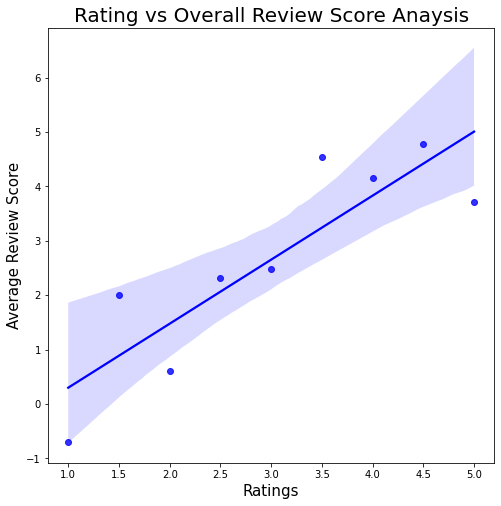

In [71]:
rating_data_reviews=merged_data_reviews_df.groupby('Rating').apply(lambda x:np.average(x['Overall Score'])).reset_index(name='Average Review Score')
plt.figure(figsize=(8,8))
sns.regplot(rating_data_reviews['Rating'],rating_data_reviews['Average Review Score'],color='b')
plt.xlabel('Ratings',size=15)
plt.ylabel('Average Review Score',size=15)
plt.title('Rating vs Overall Review Score Anaysis',size=20)

Positive vs Negative Feedbacks by Year Analysis 按年份分析的正面與負面反饋

Text(0.5, 1.0, 'Positive vs Negative Reviews over the Years')

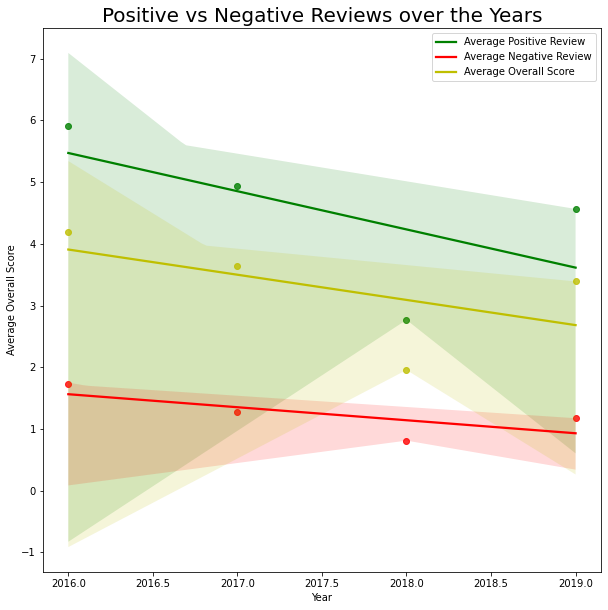

In [72]:
yes_pos_neg_df=merged_data_reviews_df[['Restaurant','Year','Positive_Count','Negative_Count','Overall Score']]
plt.figure(figsize=(10,10))
yes_pos_df=yes_pos_neg_df.groupby('Year').apply(lambda x:np.average(x['Positive_Count'])).reset_index(name='Average Positive data_reviews')
yes_neg_df=yes_pos_neg_df.groupby('Year').apply(lambda x:np.average(x['Negative_Count'])).reset_index(name='Average Negative data_reviews')
yes_score_df=yes_pos_neg_df.groupby('Year').apply(lambda x:np.average(x['Overall Score'])).reset_index(name='Average Overall Score')
sns.regplot(yes_pos_df['Year'],yes_pos_df['Average Positive data_reviews'],color='g')
sns.regplot(yes_neg_df['Year'],yes_neg_df['Average Negative data_reviews'],color='r')
sns.regplot(yes_score_df['Year'],yes_score_df['Average Overall Score'],color='y')
plt.legend(['Average Positive Review','Average Negative Review','Average Overall Score'])
plt.title('Positive vs Negative Reviews over the Years',size=20)

----------------------------分隔線-----------

In [73]:
# 連接google drive
from google.colab import drive
drive.mount('/content/gdrive')
# 載入原始檔案
metadata = pd.read_csv('/content/gdrive/My Drive/data/Restaurant names and Metadata.csv', header= 0)
print(len(metadata))
reviews = pd.read_csv('/content/gdrive/My Drive/data/Restaurant reviews.csv', header= 0)
print(len(reviews))
review = pd.read_csv('/content/gdrive/My Drive/data/Restaurant reviews.csv', header= 0)
print(len(review))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
105
10000
10000


In [74]:
metadata.drop(['Links'], axis=1, inplace=True)
metadata['Cost'] = metadata['Cost'].apply(lambda x : float(x.replace(',', '')))

In [75]:
cost = metadata[['Name', 'Cost']]

bins = pd.DataFrame(pd.cut(cost['Cost'], bins= 10))
bins.columns = ['bins']
bins['bins'] = bins['bins'].astype(str)

bins = bins['bins'].value_counts().reset_index()
bins.columns = ['Bin', 'Count']
bins["Cumsum"] = bins['Count'].cumsum()

In [76]:
#按價格範圍劃分的餐廳數量
fig = go.Figure()
fig.add_trace(go.Bar(name = "Restaurants in Range", x = bins['Bin'], y=bins['Count']))
fig.add_trace(go.Scatter(name = "Restaurants below or in Range", x = bins['Bin'], y=bins['Cumsum']))
fig.update_layout(title="No Of Restaurents by Price Range",
                 xaxis_title = "Price Range",
                 yaxis_title = "No Of Restaurants")

In [77]:
#最便宜和最貴的餐廳前5家
fig = go.Figure()

temp = cost.sort_values(by='Cost')

fig.add_trace(go.Bar(name = "Cheapest Restaurant", x = temp.head()['Name'], y=temp.head()['Cost']))
fig.add_trace(go.Bar(name="Expensive Restaurent", x = temp.tail()['Name'], y=temp.tail()['Cost']))
fig.update_layout(title = "Least and Most Expensive Restaurants:",
                 xaxis_title = "Restaurant Name",
                 yaxis_title = "Cost")
fig.show()
del temp

In [78]:
cuisines = metadata['Cuisines']
cuisines = cuisines.apply(lambda x : x.lower())

In [79]:
all_cuisines = ', '.join(i for i in cuisines.tolist())
all_cuisines = Counter(all_cuisines.split(', '))
all_cuisines = pd.DataFrame.from_dict(all_cuisines, orient='index', dtype='int')
all_cuisines.columns = ['No Of Restaurents']
all_cuisines.sort_values(by='No Of Restaurents', ascending=False, inplace=True)

In [80]:
cuisines = cuisines.apply(lambda x : x.split(', '))
cuisines = pd.DataFrame(cuisines)

for i in all_cuisines.index.tolist():
    cuisines['{}'.format(i)] = cuisines['Cuisines'].apply(lambda x : i in x)

cuisines.drop('Cuisines', axis=1, inplace=True)
cuisines = pd.concat([metadata, cuisines], axis=1)
cuisines.drop(['Collections', 'Cuisines', 'Timings'], axis=1, inplace=True)
cuisines = pd.melt(cuisines, id_vars=['Name', 'Cost'], var_name='Cuisine')
cuisines = cuisines[cuisines['value']]
cuisines.drop(['value'], axis=1, inplace=True)
del all_cuisines

In [81]:
#菜品供應情況
temp = cuisines['Cuisine'].value_counts().reset_index()

fig = px.bar(x = temp['index'], y=temp['Cuisine'])
fig.update_layout(title = "Cuisines availability",
                 xaxis_title = "Cusisine",
                 yaxis_title = "No of restaurants cuisine available at")
fig.show()
del temp

In [82]:
## Value_counts() functions returns in descending order. So we don't need to sort expliitly.
top_cuisines = cuisines['Cuisine'].value_counts().reset_index()
top_cuisines = top_cuisines['index'].tolist()[:8]

In [83]:
#最受歡迎菜系的價格分佈：
temp = cuisines[cuisines['Cuisine'].isin(top_cuisines)]

fig = px.histogram(data_frame=temp, x='Cost',
            facet_col = 'Cuisine', facet_col_wrap=4,
            title = "Price Distribution amongst most popular cuisines:")
fig.show()
del temp

In [84]:
#按菜系的平均成本
mean_cost = cuisines.groupby(by='Cuisine')['Cost'].mean().reset_index()
mean_cost.sort_values(by='Cost', ascending=False, inplace=True)

fig = px.bar(mean_cost, x='Cuisine', y='Cost')
fig.update_layout(title = "Average Cost by Cuisine",
                 xaxis_title = "Cuisine (Most to Least Expensive)",
                 yaxis_title = "Avg Cost of Cuisine")
fig.show()
del mean_cost

In [85]:
cuisine_offered = cuisines.groupby(by='Name')['Cuisine'].count().reset_index()
cuisine_offered.columns = ['Name', 'Cuisine_Offered']

metadata = pd.merge(metadata, cuisine_offered, left_on='Name', right_on = 'Name')

del cuisine_offered

Most Common Taggs:


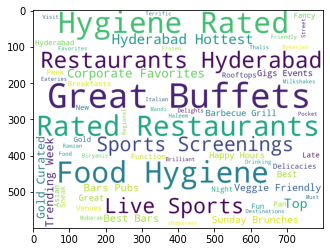

In [86]:
#最常出現的Collections(標籤)
collections = metadata['Collections'].dropna().tolist()
collections = ', '.join(i for i in collections)

wc = WordCloud(background_color="white", max_words=200, 
               width=800, height=600, random_state=1).generate(collections)
print("Most Common Taggs:")
plt.imshow(wc)
del collections

In [87]:
reviews.drop('Pictures', axis = 1, inplace=True)
reviews.dropna(inplace=True)

In [88]:
reviews['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [89]:
reviews.loc[reviews['Rating']=='Like', 'Rating'] = 3.5
reviews['Rating'] = reviews['Rating'].astype('float')

In [90]:
def get_followers(x):
    x = x.split(", ")
    try :
        x = x[1].split()[0]
    except:
        x = 0
    return x

In [91]:
reviews['Thread Review'] = reviews['Metadata'].apply(lambda x : x.split(", ")[0].split()[0])
reviews['Followers'] = reviews['Metadata'].apply(get_followers)

reviews['Thread Review'] = reviews['Thread Review'].astype('int')
reviews['Followers'] = reviews['Followers'].astype('int')

reviews.drop('Metadata', axis=1, inplace=True)

In [92]:
reviews['Time'] = reviews['Time'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [93]:
reviews['Restaurant'].value_counts().nunique()

5

In [94]:
## 100 reviews for each restaurant, Which restaurants have not been reviewd?

temp = set(metadata['Name'].tolist()) - set(reviews['Restaurant'].tolist())

print("Restaurants which have no reviews.", temp, sep = '\n')

Restaurants which have no reviews.
{'Angaara Counts 3', 'IndiBlaze', 'Sweet Basket', 'Republic Of Noodles - Lemon Tree Hotel', 'Wich Please'}


In [95]:
#評論數量分佈：
reviewers = reviews['Reviewer'].value_counts().reset_index()
reviewers.columns = ['Reviewer', 'Reviews']

fig = px.histogram(reviewers, 'Reviews')
fig.update_layout(title = "Distribution in no of reviews:",
                 xaxis_title = "No of Reviews",
                 yaxis_title = "Given By users")
fig.show()

In [96]:
temp = reviewers.head()['Reviewer'].tolist()
print("People who have posted most reviews are :", temp)

del temp, reviewers

People who have posted most reviews are : ['Ankita', 'Parijat Ray', 'Kiran', 'Jay Mehta', 'Vedant Killa']


In [97]:
mean_ratings = reviews.groupby('Restaurant')['Rating'].mean().reset_index()
mean_ratings.columns = ['Restaurant', 'Avg. Rating']
reviews = pd.merge(reviews, mean_ratings, left_on = 'Restaurant', right_on = 'Restaurant')
mean_ratings.sort_values(by='Avg. Rating', ascending = False, inplace=True)

In [98]:
#平均最高和最低的餐廳。評分：
fig = go.Figure()
fig.add_trace(go.Bar(name = "Highest Avg. Ratings",
                     x = mean_ratings.head()['Restaurant'], y = mean_ratings.head()['Avg. Rating']))
fig.add_trace(go.Bar(name = "Lowest Avg. Ratings",
                     x = mean_ratings.tail()['Restaurant'], y = mean_ratings.tail()['Avg. Rating']))

fig.update_layout(title = "Restaurents with highest and lowest avg. ratings:",
                 xaxis_title = "Restaurant Name",
                 yaxis_title = "Avg. Rating")
fig.show()

In [99]:
reviews['Hour'] = reviews['Time'].dt.hour
reviews['Month'] = reviews['Time'].dt.month

In [100]:
#按天審查提交的時間：
hour_counts = reviews['Hour'].value_counts().reset_index()
hour_counts.columns = ['Hour', 'Count']
hour_counts.sort_values(by = 'Hour')
fig = px.bar(hour_counts, 'Hour', 'Count')
fig.update_layout(title = "Reviews submissions by day Hours:",
                 xaxis_title = "Day Hour",
                 yaxis_title = "No Of Reviews")
fig.show()
del hour_counts

In [101]:
#按月審核提交：
month_counts = reviews['Month'].value_counts().reset_index()
month_counts.columns = ['month', 'Count']
month_counts.sort_values(by = 'month')
fig = px.bar(month_counts, 'month', 'Count')
fig.update_layout(title = "Reviews submissions by months:",
                 xaxis_title = "Month",
                 yaxis_title = "No Of Reviews")
fig.show()
del month_counts

In [102]:
temp = reviews.groupby(by='Hour')['Rating'].mean().reset_index()
print(temp)

    Hour    Rating
0      0  3.469548
1      1  3.468051
2      2  3.577844
3      3  3.450980
4      4  3.772727
5      5  3.846154
6      6  3.693182
7      7  3.500000
8      8  3.421642
9      9  3.649123
10    10  3.646288
11    11  3.628247
12    12  3.661957
13    13  3.673276
14    14  3.528351
15    15  3.603101
16    16  3.532847
17    17  3.671875
18    18  3.597254
19    19  3.592912
20    20  3.703081
21    21  3.580000
22    22  3.607549
23    23  3.645262


In [103]:
reviews['Weekday'] = reviews['Time'].dt.weekday
day_map = dict(zip(range(7), ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]))
reviews['Weekday'] = reviews['Weekday'].map(day_map)
del day_map

In [104]:
#工作日的評論數量：
weekday_count = reviews.groupby(by='Weekday')['Review'].count().reset_index()

fig = go.Figure(data=[
    go.Pie(labels = weekday_count['Weekday'],
           values = weekday_count['Review'],
          )
])

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title = "No of Reviews by Week-Day:")
fig.show()

In [105]:
#工作日評分分佈：
fig = px.histogram(data_frame=reviews, x='Rating',
            facet_col = 'Weekday', facet_col_wrap=4,
            title = "Rating Distribution amongst weekdays:")
fig.show()

In [106]:
#把每個使用者的觀看次數與追蹤人數化成點狀圖
fig = px.scatter(reviews, x = 'Thread Review', y='Followers')
fig.update_layout(title = "Relationship b/w Threads and Followers",
                 xaxis_title = "No Of Threads",
                 yaxis_title = "No Of Followers")

In [107]:
reviewers = reviews.groupby(by='Reviewer')['Followers', 'Thread Review'].sum().reset_index()
reviewers.sort_values(by = ['Followers'], ascending = False, inplace=True)

most_followers = reviewers.head()

reviewers.sort_values(by = ['Thread Review'], ascending = False, inplace=True)

most_threads = reviewers.head()

In [108]:
#前五名最高的追蹤數與觀看數的人
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ['Most Followers', 'Most Threads'])

fig.add_trace(go.Bar(name="Followers", x = most_followers['Reviewer'], y = most_followers['Followers']), 1,1)
fig.add_trace(go.Bar(name="Threads", x = most_followers['Reviewer'], y = most_followers['Thread Review']), 1,1)

fig.add_trace(go.Bar(name="Followers", x = most_threads['Reviewer'], y = most_threads['Followers']), 1,2)
fig.add_trace(go.Bar(name="Threads", x = most_threads['Reviewer'], y = most_threads['Thread Review']), 1,2)


fig.update_xaxes(title_text="Reviewer", row=1, col=1)
fig.update_xaxes(title_text="Reviewer", row=1, col=2)

fig.update_yaxes(title_text="Sum", row=1, col=1)
fig.update_yaxes(title_text="Sum", row=1, col=2)

fig.update_layout(title = "Reviewers with:")

In [109]:
df = pd.merge(cuisines, reviews, left_on = 'Name', right_on = 'Restaurant')
df.drop(['Name', 'Time', 'Hour', 'Month'], axis = 1, inplace = True)

In [110]:
#成本和平均之間的關係。餐廳的評分
fig = px.scatter(df, 'Cost', 'Avg. Rating', trendline = 'ols')
fig.update_layout(title = "Relationship between Cost and Avg. Raing of the restaurant")
fig.show()

In [111]:
del metadata, reviews, cuisines

In [112]:
# review = pd.read_csv("Restaurant reviews.csv")
review = review[['Review', 'Rating']]

In [113]:
review.dropna(inplace=True)

In [114]:
review['Review']= review['Review'].apply(lambda x : x.replace('\n', ' '))
review['Review']= review['Review'].apply(lambda x : x.lower())

In [115]:
review.groupby(by='Rating')['Review'].count()

Rating
1       1735
1.5        9
2        684
2.5       19
3       1192
3.5       47
4       2373
4.5       69
5       3826
Like       1
Name: Review, dtype: int64

In [116]:
review = review[review['Rating']!='Like']
review['Rating']= review['Rating'].astype('float')
review['Rating'] = review['Rating'].apply(lambda x : int(x))

In [117]:
review.groupby(by='Rating')['Review'].count()

Rating
1    1744
2     703
3    1239
4    2442
5    3826
Name: Review, dtype: int64

In [118]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [119]:
import nltk
from nltk.tokenize import word_tokenize

review['Words'] = review['Review'].apply(word_tokenize)

from nltk.corpus import stopwords 

StopWords = set(stopwords.words('english'))

def clean_words(x):
    words = []
    for i in x:
        if i.isalnum() and i not in StopWords:
            words.append(i)
    return words

review['Words'] = review['Words'].apply(clean_words)
review['Word Count'] = review['Words'].apply(lambda x : len(x))
del StopWords

In [120]:
review.groupby(by='Rating')['Word Count'].mean()

Rating
1    24.207569
2    26.960171
3    30.414044
4    34.974201
5    21.763461
Name: Word Count, dtype: float64

In [121]:
#評價中的字數分佈。
fig = px.histogram(review, x='Word Count', color='Rating',
            barmode = 'overlay', nbins=50, marginal = 'box')
fig.update_layout(title = "Word Count Distribution in Reviews by Ratings.",
                 xaxis_title = "Word Count",
                 yaxis_title = "No of Reviews")
fig.show()

In [122]:
review.drop('Word Count', axis = 1, inplace=True)

In [123]:
most_common = dict()

for group, data in review.groupby(by='Rating'):
    words = []
    for i in data['Words'].tolist():
        words.extend(i)
    words = nltk.FreqDist(words)
    words = words.most_common(10)
    most_common['{}'.format(group)] = words
print("Most Common Words by ratings and their word-counts:")
pd.DataFrame(most_common)

Most Common Words by ratings and their word-counts:


1               2                3                4  \
0     (food, 983)     (food, 475)     (good, 1088)     (good, 2462)   
1  (ordered, 546)     (good, 379)      (food, 861)    (place, 2015)   
2    (place, 540)    (place, 296)     (place, 687)     (food, 1738)   
3    (order, 508)  (ordered, 236)   (chicken, 494)  (chicken, 1120)   
4    (worst, 474)  (chicken, 219)   (service, 416)   (service, 741)   
5  (chicken, 435)  (service, 217)     (taste, 399)  (ambience, 704)   
6  (service, 419)    (taste, 206)   (ordered, 366)     (taste, 689)   
7      (bad, 403)     (like, 132)  (ambience, 360)       (one, 686)   
8     (good, 402)     (time, 118)       (one, 249)   (ordered, 624)   
9     (even, 363)      (bad, 117)      (like, 234)     (great, 600)   

                 5  
0     (good, 2667)  
1     (food, 2335)  
2    (place, 2108)  
3  (service, 1285)  
4     (great, 988)  
5      (best, 820)  
6   (chicken, 782)  
7      (nice, 734)  
8  (ambience, 718)  
9    (really, 699)

In [124]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [125]:
review['POS'] = review['Words'].apply(nltk.pos_tag)

In [126]:
def get_adjective(x):
    adj = set(['JJ', 'JJR', 'JJS'])
    word = []
    for i in x:
        if i[1] in adj:
            word.append(i[0])
    return word

review['ADJ'] = review['POS'].apply(get_adjective)

most_common = dict()
for group, data in review.groupby(by='Rating'):
    words = []
    for i in data['ADJ'].tolist():
        words.extend(i)
    words = nltk.FreqDist(words)
    words = words.most_common(10)
    most_common['{}'.format(group)] = words
print("Most Common Adjectives by ratings:")
pd.DataFrame(most_common)

Most Common Adjectives by ratings:


1                   2               3                 4  \
0        (worst, 403)         (good, 363)    (good, 1063)      (good, 2417)   
1          (bad, 403)          (bad, 117)    (great, 230)      (great, 600)   
2         (good, 385)         (great, 67)     (nice, 156)       (nice, 448)   
3     (pathetic, 142)       (average, 63)  (overall, 142)       (best, 391)   
4       (chicken, 97)          (main, 47)  (average, 119)    (overall, 292)   
5      (horrible, 84)       (overall, 46)     (main, 105)  (delicious, 237)   
6         (table, 84)          (much, 43)   (decent, 103)       (main, 215)   
7          (poor, 84)  (disappointed, 40)     (much, 102)     (little, 212)   
8          (much, 78)      (pathetic, 37)    (little, 96)    (chicken, 195)   
9  (disappointed, 72)         (table, 34)       (bad, 92)       (fish, 175)   

                  5  
0      (good, 2630)  
1      (great, 988)  
2       (best, 693)  
3       (nice, 671)  
4    (awesome, 438)  
5  (delicious, 328)  
6  (excellent, 305)  
7   (friendly, 205)  
8    (amazing, 199)  
9    (special, 190)

In [127]:
def get_noun(x):
    noun = set(['NN', 'NNS', 'NNP', 'NNPS'])
    word = []
    for i in x:
        if i[1] in noun:
            word.append(i[0])
    return word

review['Noun'] = review['POS'].apply(get_noun)

review.drop('POS', axis = 1, inplace = True)

most_common = dict()
for group, data in review.groupby(by='Rating'):
    words = []
    for i in data['Noun'].tolist():
        words.extend(i)
    words = nltk.FreqDist(words)
    words = words.most_common(10)
    most_common['{}'.format(group)] = words
print("Most Common Nouns by ratings:")
pd.DataFrame(most_common)

Most Common Nouns by ratings:


1                 2                3                4  \
0        (food, 983)       (food, 475)      (food, 861)    (place, 1927)   
1       (place, 518)      (place, 278)     (place, 657)     (food, 1738)   
2       (order, 508)    (service, 213)   (service, 407)   (service, 722)   
3     (service, 410)      (taste, 191)     (taste, 366)   (chicken, 665)   
4  (experience, 292)    (chicken, 133)  (ambience, 320)  (ambience, 642)   
5  (restaurant, 289)       (time, 118)   (chicken, 315)     (taste, 636)   
6       (taste, 256)    (ambience, 92)      (time, 194)      (time, 401)   
7        (time, 255)  (experience, 88)   (biryani, 156)   (biryani, 337)   
8     (chicken, 234)     (quality, 84)     (order, 148)     (staff, 332)   
9     (biryani, 213)        (rice, 82)       (veg, 143)       (veg, 273)   

                   5  
0       (food, 2335)  
1      (place, 2034)  
2    (service, 1270)  
3    (ambience, 636)  
4        (time, 596)  
5       (taste, 587)  
6       (staff, 551)  
7     (chicken, 457)  
8  (experience, 392)  
9       (visit, 376)

In [128]:
most_common = dict()
for group, data in review.groupby(by='Rating'):
    words = []
    for i in data['Words'].tolist():
        words.extend(i)
    bigram = list(nltk.bigrams(words))
    bigram = nltk.FreqDist(bigram)
    bigram = bigram.most_common(10)
    most_common['{}'.format(group)] = bigram

print("Most Common Bi-grams by Ratings:")
pd.DataFrame(most_common)

Most Common Bi-grams by Ratings:


1                         2  \
0  ((worst, experience), 75)      ((main, course), 42)   
1    ((bad, experience), 68)        ((food, good), 36)   
2       ((waste, money), 61)        ((good, food), 27)   
3       ((main, course), 54)  ((ordered, chicken), 24)   
4   ((ordered, chicken), 51)       ((taste, good), 21)   
5      ((quality, food), 46)    ((ambience, good), 20)   
6        ((worst, food), 44)     ((food, quality), 20)   
7       ((zomato, gold), 42)        ((ice, cream), 20)   
8         ((ice, cream), 42)    ((visited, place), 18)   
9      ((food, quality), 40)          ((non, veg), 17)   

                          3                      4                       5  
0      ((main, course), 84)     ((must, try), 188)      ((must, try), 222)  
1        ((food, good), 72)   ((good, place), 183)     ((good, food), 210)  
2      ((really, good), 49)  ((main, course), 176)     ((food, good), 177)  
3       ((taste, good), 48)    ((good, food), 166)  ((good, service), 175)  
4     ((service, good), 45)  ((really, good), 160)   ((really, good), 166)  
5        ((good, food), 43)    ((food, good), 150)      ((one, best), 164)  
6    ((ambience, good), 41)  ((visit, place), 119)     ((good, good), 149)  
7       ((good, place), 40)     ((one, best), 108)   ((visit, place), 140)  
8       ((fried, rice), 38)     ((also, good), 98)    ((best, place), 132)  
9  ((chicken, biryani), 38)    ((nice, place), 95)    ((must, visit), 129)

In [129]:
del most_common

In [130]:
#不同評級評論中的主觀性分佈。
from textblob import TextBlob

review['Subjectivity'] = review['Review'].apply(lambda x : TextBlob(x).sentiment.subjectivity)
review['Polarity'] = review['Review'].apply(lambda x : TextBlob(x).sentiment.polarity)

In [131]:
fig = px.histogram(review, x='Subjectivity', barmode='overlay', color='Rating')
fig.update_layout(title = "Subjectivity distribution in reviews of different ratings.",
                 xaxis_title = "Subjectivity",
                 yaxis_title = "Number of Reviews")
fig.show()

In [132]:
fig = px.histogram(review, x='Polarity', barmode='overlay', color='Rating')

fig.update_layout(title = "Polarity distribution in reviews of different ratings.",
                 xaxis_title = "Subjectivity",
                 yaxis_title = "Number of Reviews")
fig.show()